## Delhi High Court Judgement Analysis sample

A short notebook demonstrating some of the analysis that can be done with present metadata about judgements from the Delhi High Court in 2018.

In [80]:
import pandas as pd
import altair as alt

from IPython.display import HTML

## What data do we have?

For all cases judged by the Delhi High Court in 2018 (1 Jan to 31 Dec), we have the following information.

1. **case_number** - A string that indicates the type and identifier of a case. 
2. **date** - When this judgement was published
3. **download_link** - The judgement document itself. Several cases can be settled in the same judgement, so this link can be used to figure out which cases have been delivered together.
4. **judge_name** - Name of the judge involved in the judgement. Multiple judges can be involved in a judgement, so there might be repeating entries.
5. **party** - Names of the parties involved in this case.
6. **type** - Type of case that was settled, indicated by an acronym

We can do a lot of meta analysis using just this information.

We've data about all the cases with judgements from the delhi high court in `delhi.json`. This was generated with `courtlight/highcourts/delhi.py`. 


In [38]:
with open('delhi.jsonl') as f:
    cases = pd.read_json(f, lines=True)
    
# Parse date so we can do date-time math on it
cases['date'] = pd.to_datetime(cases['date'], dayfirst=True)

# Determine type of case
cases['type'] = cases['case_number'].str.replace(r'-.*$', '')

cases.head()

,case_number,date,download_link,judge_name,party,type
0,LPA--732/2018,2018-12-21,http://lobis.nic.in/ddir/dhc/VKR/judgement/07-...,CHIEF JUSTICE RAJENDRA MENON,ALL INDIA IDBI OFFICERS ASSOCIATION Vs.UNION O...,LPA
1,LPA--729/2018,2018-12-21,http://lobis.nic.in/ddir/dhc/VKR/judgement/24-...,CHIEF JUSTICE RAJENDRA MENON,DEVENDRA KUMAR GUPTA Vs.UNION OF INDIA & ORS,LPA
2,LPA--711/2018,2018-12-19,http://lobis.nic.in/ddir/dhc/VKR/judgement/20-...,CHIEF JUSTICE RAJENDRA MENON,UNION OF INDIA & ANR Vs.CHAND KAUR & ANR,LPA
3,LPA--637/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/18-...,CHIEF JUSTICE RAJENDRA MENON,MAHYCO MONSANTO BIOTECH (INDIA) PRIVATE LTD & ...,LPA
4,W.P.(C)--13687/2018,2018-12-18,http://lobis.nic.in/ddir/dhc/VKR/judgement/19-...,CHIEF JUSTICE RAJENDRA MENON,PARVESH JAIN Vs.IDBI BANK LTD & ORS,W.P.(C)


## Total cases by judge

Now that we have this data, let's see how many cases each judge has decided in 2018

In [35]:
cases.groupby('judge_name')\
    .count().sort_values('case_number', ascending=False)\
    .rename(columns={'case_number': 'total_cases'})['total_cases'].reset_index()

,judge_name,total_cases
0,JUSTICE SUNIL GAUR,1035
1,JUSTICE SANJEEV SACHDEVA,920
2,JUSTICE R. K. GAUBA,664
3,JUSTICE S.RAVINDRA BHAT,579
4,JUSTICE SANGITA DHINGRA SEHGAL,533
5,JUSTICE G. S. SISTANI,526
6,JUSTICE A.K. CHAWLA,506
7,JUSTICE PRATHIBA M. SINGH,506
8,JUSTICE S. MURALIDHAR,453
9,JUSTICE VALMIKI J. MEHTA,419


### Deeper dive into a single judge

We can ask more detailed questions about each judge. For example, Justice Sunil Gaur seems to have judged a *lot* of cases - almost 3 a day on average! 

#### Types of cases

Let's see what kind of cases he is judging the most.

In [79]:
def case_type_counts(judge_name):
    judge_cases = cases[cases.judge_name == judge_name]
    return judge_cases.groupby('type').count().rename(columns={'case_number': 'cases'})['cases'].reset_index().sort_values('cases', ascending=False)

display(HTML('<strong>Types of cases judged by Justice Sunil Gaur'))
case_type_counts('JUSTICE SUNIL GAUR')

,type,cases
9,W.P.(C),618
7,MAC.APP.,323
3,CRL.M.C.,43
1,CONT.CAS(C),18
2,CRL.A.,17
0,CM(M),10
6,LPA,2
4,CRL.REV.P.,1
5,LA.APP.,1
8,RFA,1


We can easily find this stat for any judge. For example, here are the numbers for Justice Sanjeev Sachdeva

In [162]:
display(HTML('<strong>Types of cases judged by Justice Sanjeev Sachdeva'))
case_type_counts('JUSTICE SANJEEV SACHDEVA')

,type,cases
7,CRL.M.C.,507
1,BAIL APPLN.,269
8,CRL.REV.P.,85
18,W.P.(CRL),12
13,LPA,11
16,SERTA,7
9,CS(OS),7
2,CEAC,4
17,W.P.(C),4
12,ITA,3


#### Case load

We can see how many cases they both handle through the year, per week

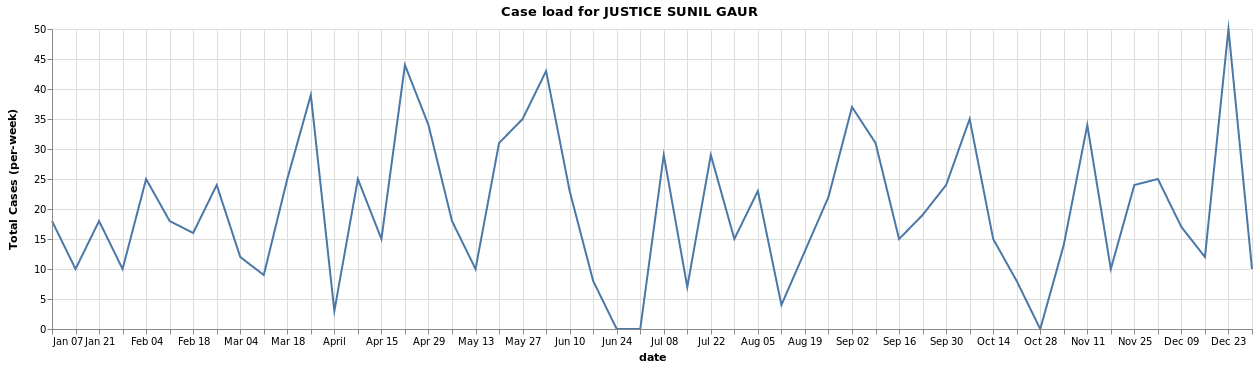

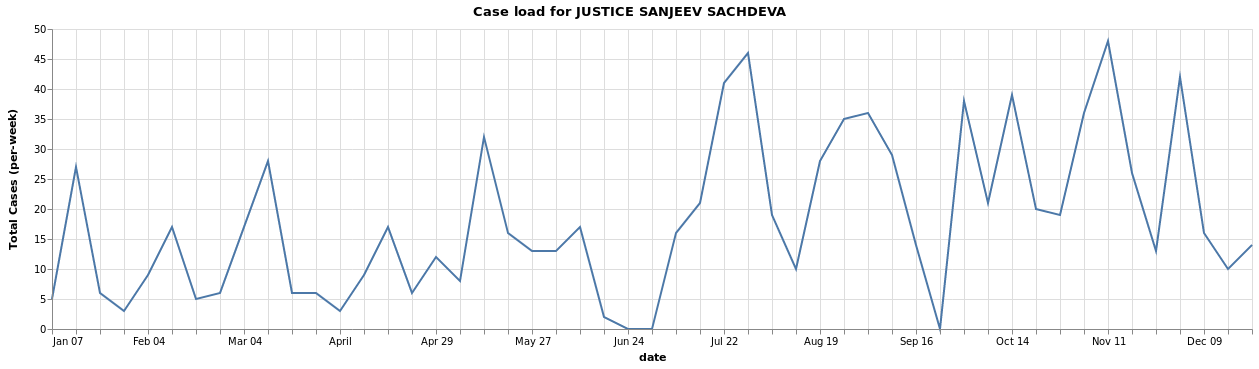

In [167]:
def case_load(judge_name):
    cases_by_week = cases[cases.judge_name == judge_name].set_index('date').resample('W')
    return alt.Chart(cases_by_week.count().reset_index(), title=f'Case load for {judge_name}', width=1200).mark_line().encode(
        x='date',
        y=alt.Y('case_number', title='Total Cases (per-week)')
    )

    
display(case_load('JUSTICE SUNIL GAUR'))
display(case_load('JUSTICE SANJEEV SACHDEVA'))

## Judgements

Each judgement may decide on many number of cases. For analysis purposes, judgements are often more useful than cases. Each judgement is defined by a single PDF document, linked to in the field `download_link`. Note that a judgement can be counted for multiple judges who co-authored it.

In [198]:
judgements_per_judge = cases.groupby(['date', 'judge_name']).nunique('download_link').rename(columns={'download_link': 'judgements'})['judgements'].reset_index()
display(HTML('<strong>Judgements written per Judge</strong>'))
judgements_per_judge.groupby('judge_name').sum().sort_values('judgements', ascending=False)

,judgements
judge_name,
JUSTICE SANJEEV SACHDEVA,909
JUSTICE SUNIL GAUR,846
JUSTICE R. K. GAUBA,512
JUSTICE SANGITA DHINGRA SEHGAL,506
JUSTICE G. S. SISTANI,501
JUSTICE PRATHIBA M. SINGH,480
JUSTICE S.RAVINDRA BHAT,421
JUSTICE VALMIKI J. MEHTA,419
JUSTICE A.K. CHAWLA,360


### Judgements over time 

We can also list Judgements over time for all judges. This is a bit of a crazy graph though.

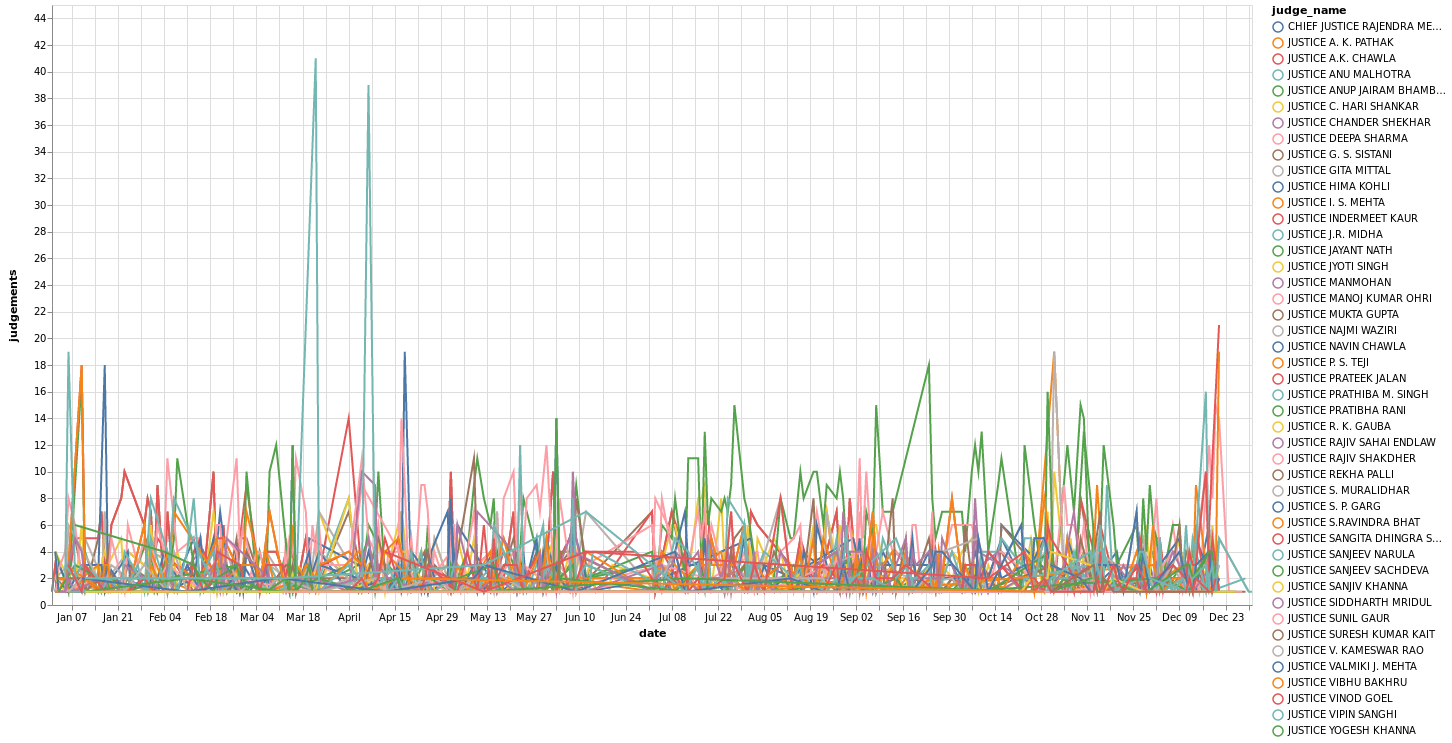

In [199]:
alt.Chart(judgements_per_judge, width=1200, height=600).mark_line().encode(
    x='date',
    y='judgements',
    color='judge_name',
    tooltip='judge_name'
)

### Judgements per Judge Histogram

We can also see the general distribution of how many judges write how many judgements.

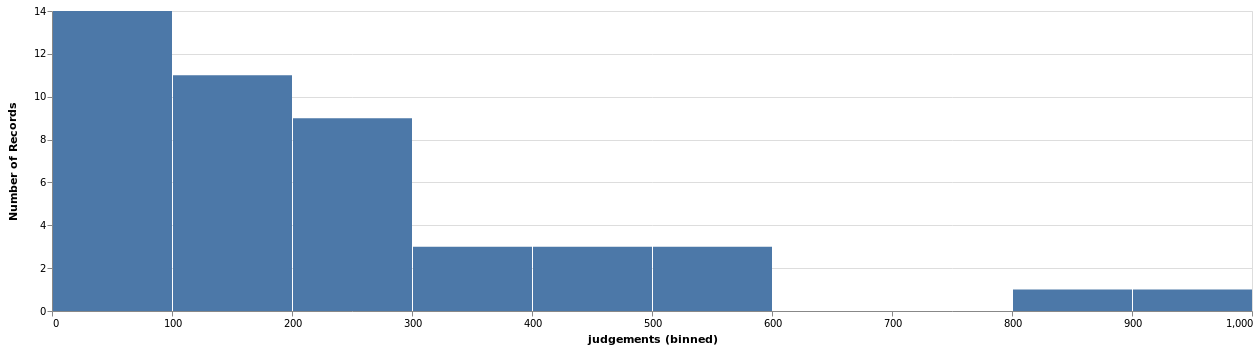

In [209]:
total_judgements_per_judge = judgements_per_judge.groupby('judge_name').sum().reset_index()
alt.Chart(total_judgements_per_judge, width=1200).mark_bar().encode(
    x=alt.X('judgements', bin=alt.Bin(maxbins=10)),
    y='count()'
)